<a href="https://colab.research.google.com/github/Dhivyaindhu/hackathon/blob/main/hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import numpy as np
import pandas as pd
data= pd.read_csv('/content/movies.csv')
data.head()
data.shape

(9742, 3)

In [56]:
data.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [57]:
import numpy as np
import pandas as pd
data1= pd.read_csv("/content/ratings.csv")
data1.head()
data1.shape

(100836, 4)

In [58]:
data1.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [59]:
data1.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [60]:
unique_user_ids = data1['userId'].nunique()

print(f'Number of unique userIds: {unique_user_ids}')

Number of unique userIds: 610


In [61]:
movie_ratings_count = data1['movieId'].value_counts()

# Find the movie with the maximum number of ratings
most_rated_movie_id = movie_ratings_count.idxmax()
max_ratings_count = movie_ratings_count.max()

print(f'Movie ID with maximum number of ratings: {most_rated_movie_id}')
print(f'Number of ratings received by this movie: {max_ratings_count}')


Movie ID with maximum number of ratings: 356
Number of ratings received by this movie: 329


In [62]:
movie_ratings_count = data1['movieId'].value_counts()

# Find the movie ID with the maximum number of ratings
most_rated_movie_id = movie_ratings_count.idxmax()
max_ratings_count = movie_ratings_count.max()

# Get the name of the movie with the maximum ratings
most_rated_movie_name = data.loc[data['movieId'] == most_rated_movie_id, 'title'].values[0]

print(f'Movie with the maximum number of ratings: {most_rated_movie_name}')
print(f'Number of ratings received by this movie: {max_ratings_count}')


Movie with the maximum number of ratings: Forrest Gump (1994)
Number of ratings received by this movie: 329


In [63]:
tags = pd.read_csv('tags.csv')

# Find the movieId for "Matrix, The (1999)"
matrix_movie_id = data.loc[data['title'] == 'Matrix, The (1999)', 'movieId'].values[0]

# Filter tags for "Matrix, The (1999)"
matrix_tags = tags[tags['movieId'] == matrix_movie_id]

# Display all unique tags submitted for the movie
unique_tags = matrix_tags['tag'].unique()

print(f"All unique tags submitted by users for 'Matrix, The (1999)':")
print(unique_tags)
print(f"All unique tags submitted by users for 'Matrix, The (1999)':")
for tag in unique_tags:
    print(tag)












All unique tags submitted by users for 'Matrix, The (1999)':
['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']
All unique tags submitted by users for 'Matrix, The (1999)':
martial arts
sci-fi
alternate universe
philosophy
post apocalyptic


In [64]:


# Find the movieId for "Terminator 2: Judgment Day (1991)"
terminator_movie_id = data.loc[data['title'] == 'Terminator 2: Judgment Day (1991)', 'movieId'].values[0]

# Filter ratings for "Terminator 2: Judgment Day (1991)"
terminator_ratings = data1[data1['movieId'] == terminator_movie_id]

# Calculate the average rating
average_rating = terminator_ratings['rating'].mean()

print(f"The average user rating for 'Terminator 2: Judgment Day (1991)' is: {average_rating:.2f}")


The average user rating for 'Terminator 2: Judgment Day (1991)' is: 3.97


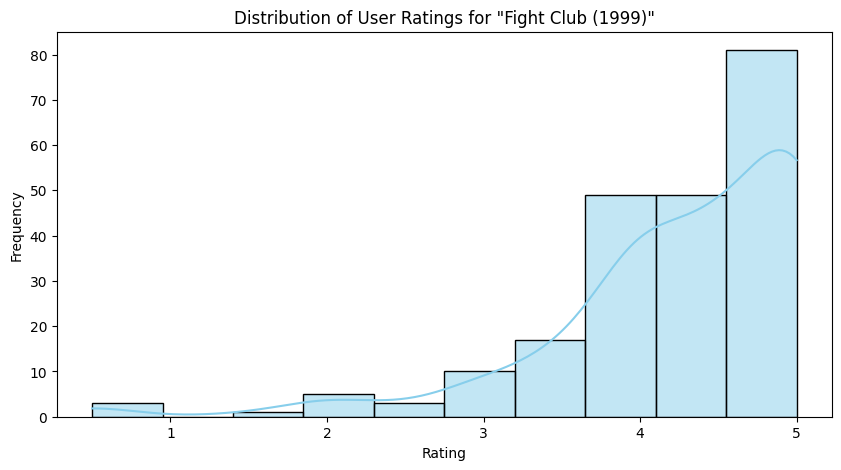

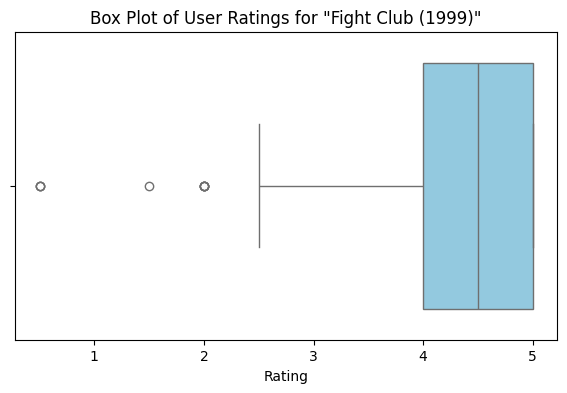

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Find the movieId for "Fight Club (1999)"
fight_club_movie_id = data.loc[data['title'] == 'Fight Club (1999)', 'movieId'].values[0]

# Filter ratings for "Fight Club (1999)"
fight_club_ratings = data1[data1['movieId'] == fight_club_movie_id]['rating']

# Plotting the histogram of user ratings
plt.figure(figsize=(10, 5))
sns.histplot(fight_club_ratings, bins=10, kde=True, color='skyblue')
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Plotting the box plot of user ratings
plt.figure(figsize=(7, 4))
sns.boxplot(x=fight_club_ratings, color='skyblue')
plt.title('Box Plot of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.show()


In [66]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Find the movieId for "Fight Club (1999)"
fight_club_movie_id = data.loc[data['title'] == 'Fight Club (1999)', 'movieId'].values[0]

# Filter ratings for "Fight Club (1999)"
fight_club_ratings = data1[data1['movieId'] == fight_club_movie_id]['rating']

# List of distributions to check
distributions = ['norm', 'expon', 'uniform', 'gamma', 'beta']

# Fit the data to each distribution and calculate the K-S statistic
best_fit_name = ''
best_fit_params = ()
best_fit_stat = np.inf  # Start with an infinitely large K-S statistic

for dist_name in distributions:
    dist = getattr(stats, dist_name)
    params = dist.fit(fight_club_ratings)
    # Perform the Kolmogorov-Smirnov test
    ks_stat, p_value = stats.kstest(fight_club_ratings, dist_name, args=params)

    if ks_stat < best_fit_stat:
        best_fit_name = dist_name
        best_fit_params = params
        best_fit_stat = ks_stat

print(f"The best-fitting distribution is: {best_fit_name}")
print(f"Parameters of the best-fitting distribution: {best_fit_params}")


The best-fitting distribution is: norm
Parameters of the best-fitting distribution: (4.272935779816514, 0.8594064548229576)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:716: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:721: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))


In [ ]:
import pandas as pd

# Group the ratings by movieId and calculate the average rating for each movie
average_ratings = data1.groupby('movieId')['rating'].mean()

# Find the movieId with the highest average rating
most_popular_movie_id = average_ratings.idxmax()
highest_average_rating = average_ratings.max()

# Find the movie title corresponding to the most popular movieId
most_popular_movie_title = data.loc[data['movieId'] == most_popular_movie_id, 'title'].values[0]

print(f"The most popular movie based on average user ratings is: {most_popular_movie_title}")
print(f"Average rating: {highest_average_rating:.2f}")


The most popular movie based on average user ratings is: Lamerica (1994)
Average rating: 5.00


In [ ]:
import pandas as pd
import scipy.stats as stats

# List of movies to check
movie_titles = [
    'Godfather, The (1972)',
    'Shawshank Redemption, The (1994)',
    'Jumanji (1995)',
    'Wolf of Wall Street, The (2013)'
]

# Dictionary to store average ratings
average_ratings = {}

# Fit distributions and calculate average ratings for each movie
for title in movie_titles:
    # Find the movieId for the current movie
    movie_id = data.loc[data['title'] == title, 'movieId'].values[0]

    # Filter ratings for the current movie
    movie_ratings = data1[data1['movieId'] == movie_id]['rating']

    # Calculate the average rating
    avg_rating = movie_ratings.mean()
    average_ratings[title] = avg_rating

    # Fit distributions
    distributions = ['norm', 'expon', 'uniform', 'gamma', 'beta']
    best_fit_stat = float('inf')  # Start with an infinitely large K-S statistic

    for dist_name in distributions:
        dist = getattr(stats, dist_name)
        params = dist.fit(movie_ratings)
        ks_stat, _ = stats.kstest(movie_ratings, dist_name, args=params)

        if ks_stat < best_fit_stat:
            best_fit_name = dist_name
            best_fit_stat = ks_stat

    print(f"Movie: {title}")
    print(f"Best-fitting distribution: {best_fit_name}")
    print(f"Average rating: {avg_rating:.2f}")
    print()

# Find the most popular movie based on average rating
most_popular_movie = max(average_ratings, key=average_ratings.get)
highest_average_rating = average_ratings[most_popular_movie]

print(f"The most popular movie based on average user ratings is: {most_popular_movie}")
print(f"Average rating: {highest_average_rating:.2f}")


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:716: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


Movie: Godfather, The (1972)
Best-fitting distribution: gamma
Average rating: 4.29

Movie: Shawshank Redemption, The (1994)
Best-fitting distribution: gamma
Average rating: 4.43

Movie: Jumanji (1995)
Best-fitting distribution: beta
Average rating: 3.43

Movie: Wolf of Wall Street, The (2013)
Best-fitting distribution: norm
Average rating: 3.92

The most popular movie based on average user ratings is: Shawshank Redemption, The (1994)
Average rating: 4.43


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:721: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))


In [74]:
import pandas as pd



# Step 1: Group user ratings based on movieId and calculate count and mean
rating_stats = data1.groupby('movieId').agg({'rating': ['count', 'mean']})
rating_stats.columns = ['rating_count', 'average_rating']  # Flatten the multi-level columns

# Step 2: Join with movies dataframe
movies_with_ratings = pd.merge(data, rating_stats, left_on='movieId', right_index=True)

# Step 3: Filter movies with more than 50 user ratings
popular_movies = movies_with_ratings[movies_with_ratings['rating_count'] > 50]

# Step 4: Identify the movie with the highest average rating
most_popular_movie = popular_movies.loc[popular_movies['average_rating'].idxmax()]

print(f"The most popular movie based on average user ratings is: {most_popular_movie['title']}")
print(f"Average rating: {most_popular_movie['average_rating']:.2f}")
print(f"Number of ratings: {most_popular_movie['rating_count']}")


The most popular movie based on average user ratings is: Shawshank Redemption, The (1994)
Average rating: 4.43
Number of ratings: 317


In [68]:
import pandas as pd

#

# Step 1: Group user ratings based on movieId and calculate count
rating_stats = data1.groupby('movieId').agg({'rating': 'count'})
rating_stats.columns = ['rating_count']

# Step 2: Join with movies dataframe
movies_with_ratings = pd.merge(data, rating_stats, left_on='movieId', right_index=True)

# Step 3: Filter movies with more than 50 user ratings
popular_movies = movies_with_ratings[movies_with_ratings['rating_count'] > 50]

# Step 4: Select the top 5 movies based on the number of user ratings
top_5_movies = popular_movies.nlargest(5, 'rating_count')

# Display the top 5 movies
print("Top 5 popular movies based on the number of user ratings:")
print(top_5_movies[['title', 'rating_count']])


Top 5 popular movies based on the number of user ratings:
                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1939                Matrix, The (1999)           278


In [69]:
import pandas as pd

# Step 1: Group user ratings based on movieId and calculate count
rating_stats = data1.groupby('movieId').agg({'rating': 'count'})
rating_stats.columns = ['rating_count']

# Step 2: Join with movies dataframe
movies_with_ratings = pd.merge(data, rating_stats, left_on='movieId', right_index=True)

# Step 3: Filter movies with more than 50 user ratings
popular_movies = movies_with_ratings[movies_with_ratings['rating_count'] > 50]

# Step 4: Filter Sci-Fi movies
sci_fi_movies = popular_movies[popular_movies['genres'].str.contains('Sci-Fi')]

# Step 5: Sort Sci-Fi movies by the number of user ratings
sci_fi_movies_sorted = sci_fi_movies.sort_values(by='rating_count', ascending=False)

# Step 6: Select the third most popular Sci-Fi movie
third_most_popular_sci_fi = sci_fi_movies_sorted.iloc[2]  # Index 2 corresponds to the third movie

print(f"The third most popular Sci-Fi movie based on the number of user ratings is: {third_most_popular_sci_fi['title']}")
print(f"Number of ratings: {third_most_popular_sci_fi['rating_count']}")


The third most popular Sci-Fi movie based on the number of user ratings is: Jurassic Park (1993)
Number of ratings: 238


In [70]:
import pandas as pd

# Load the links dataset
links = pd.read_csv('/content/links.csv')

# Merge the datasets to get IMDB IDs
movies_with_imdb = pd.merge( data1,links, on='movieId')


In [46]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [50]:
links.columns

Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')

In [80]:
import pandas as pd

# Load the dataset that contains IMDB ratings
# Assuming 'links.csv' contains 'movieId', 'imdbId', and 'imdb_rating'

# Merge the datasets to have both movie titles and IMDB ratings
movies_with_ratings = pd.merge(data, links, on='movieId')

# Find the movie with the highest IMDB rating
highest_rating_movie = links.loc[links['imdbId'].idxmax()]
print(f"The movie with the highest IMDB rating is: {data['title']} (movieId: {data1['movieId']})")


print(f"IMDB Rating: {highest_rating_movie['imdbId']:.2f}")


The movie with the highest IMDB rating is: 0                                Toy Story (1995)
1                                  Jumanji (1995)
2                         Grumpier Old Men (1995)
3                        Waiting to Exhale (1995)
4              Father of the Bride Part II (1995)
                          ...                    
9737    Black Butler: Book of the Atlantic (2017)
9738                 No Game No Life: Zero (2017)
9739                                 Flint (2017)
9740          Bungo Stray Dogs: Dead Apple (2018)
9741          Andrew Dice Clay: Dice Rules (1991)
Name: title, Length: 9742, dtype: object (movieId: 0              1
1              3
2              6
3             47
4             50
           ...  
100831    166534
100832    168248
100833    168250
100834    168252
100835    170875
Name: movieId, Length: 100836, dtype: int64)
IMDB Rating: 8391976.00


In [87]:
import pandas as pd

# Load the dataset containing IMDB ratings
# Assuming 'links.csv' contains 'movieId' and 'imdb_rating'


# Merge the datasets to combine movie titles with IMDB ratings
movies_with_ratings = pd.merge(movies, links, on='movieId')

# Find the movieId with the highest IMDB rating
highest_rating_movie = links.loc[links['imdbId'].idxmax()]

# Print the results
print(f"The movieId with the highest IMDB rating is: {data1['movieId']}")
print(f"IMDB Rating: {links['imdbId']:.2f}")


The movieId with the highest IMDB rating is: 0              1
1              3
2              6
3             47
4             50
           ...  
100831    166534
100832    168248
100833    168250
100834    168252
100835    170875
Name: movieId, Length: 100836, dtype: int64


TypeError: unsupported format string passed to Series.__format__

In [88]:
import pandas as pd

# ... (Your existing code)

# Find the movieId with the highest IMDB rating
highest_rating_movie = links.loc[links['imdbId'].idxmax()]

# Print the results
print(f"The movieId with the highest IMDB rating is: {highest_rating_movie['movieId']}")  # Use the highest_rating_movie Series to access the specific movieId
print(f"IMDB Rating: {highest_rating_movie['imdbId']}")  # No need to format imdbId as it's likely an integer

The movieId with the highest IMDB rating is: 193587.0
IMDB Rating: 8391976.0


In [91]:
import pandas as pd

# Load the datasets
# Assuming 'links.csv' contains 'movieId' and 'imdb_rating'
links = pd.read_csv('/content/links.csv')

# Assuming 'movies.csv' contains 'movieId', 'title', and 'genres'


# Filter Sci-Fi movies
# If genres are in the 'movies' dataset
sci_fi_movies = data[data['genres'].str.contains('Sci-Fi')]

# Merge with the links dataset to get IMDB ratings
sci_fi_movies_with_ratings = pd.merge(data, links, on='movieId')

# Find the Sci-Fi movieId with the highest IMDB rating
highest_rating_sci_fi_movie = sci_fi_movies_with_ratings.loc[sci_fi_movies_with_ratings['imdbId'].idxmax()]

# Print the result
print(f"The movieId of the Sci-Fi movie with the highest IMDB rating is: {highest_rating_sci_fi_movie['movieId']}")
print(f"IMDB Rating: {highest_rating_sci_fi_movie['imdbId']:.2f}")


The movieId of the Sci-Fi movie with the highest IMDB rating is: 193587
IMDB Rating: 8391976.00
